# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [6]:
st=pd.read_csv("../data/states_edu.csv")
st.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [12]:
st.isna().sum()
st.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [13]:
print(st["YEAR"].nunique())

13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [34]:
print(st[st["STATE"]=="MICHIGAN" ]["AVG_MATH_8_SCORE"].mean())
print(st[st["STATE"]=="OHIO" ]["AVG_MATH_8_SCORE"].mean())
#"OHIO"

276.1666666666667
282.25


Find the average for your chosen test across all states in 2019

In [29]:
st[st["YEAR"]==2019]["AVG_MATH_8_SCORE"].mean()

281.2641509433962

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [32]:
st.groupby("STATE")["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [47]:
st.drop(columns = ["GRADES_12_G","GRADES_4_G","AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"])

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_8_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,58025.0,NaN,NaN,731634.0,252.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,49081.0,NaN,NaN,673477.0,265.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,36011.0,NaN,NaN,441490.0,256.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,363296.0,NaN,NaN,5254844.0,261.0
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,45025.0,NaN,NaN,612635.0,272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.0


In [52]:
st.dropna(subset=['SUPPORT_SERVICES_EXPENDITURE'], inplace=True)

In [100]:
st["avg expenditure"]= st["SUPPORT_SERVICES_EXPENDITURE"]/st["GRADES_ALL_G"]
st["grade 8 %"]= st["GRADES_8_G"]*100/st["GRADES_ALL_G"]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_8_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_8_SCORE,avg expenditure,grade 8 %
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,174053.0,8224.0,55460.0,58025.0,NaN,NaN,731634.0,252.0,1.004650,7.930878
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,609114.0,2544.0,53497.0,49081.0,NaN,NaN,673477.0,265.0,1.496312,7.287702
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,145212.0,808.0,33511.0,36011.0,NaN,NaN,441490.0,256.0,1.095128,8.156697
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,2044688.0,59067.0,431763.0,363296.0,NaN,NaN,5254844.0,261.0,1.621537,6.913545
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,364760.0,7410.0,47588.0,45025.0,NaN,NaN,612635.0,272.0,1.691007,7.349401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,1086722.0,33453.0,90942.0,95221.0,772414.0,386781.0,1283590.0,288.0,3.954151,7.418335
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,1601069.0,13733.0,79692.0,79483.0,656797.0,336808.0,1087030.0,287.0,4.149538,7.311942
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,232738.0,15077.0,20163.0,20426.0,162070.0,80142.0,277452.0,271.0,4.187910,7.361994
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,894823.0,55907.0,58078.0,61084.0,489919.0,263896.0,867800.0,289.0,4.254216,7.038949


Feature engineering justification: **To not overcomplicated the model, I simply calculate the average service support expenditure for all students enrolled in each state, and calculate the percentage of 8th graders among all enrolled students after dropping nas.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '8th Grade MATH Score Over Time')

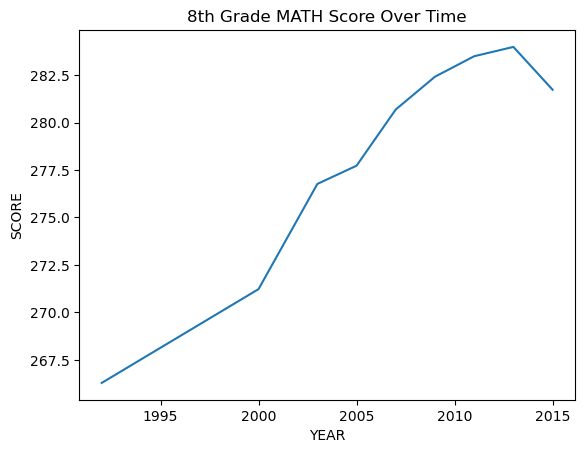

In [101]:
st.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade MATH Score Over Time')

Text(0.5, 1.0, 'expenditure per student over time')

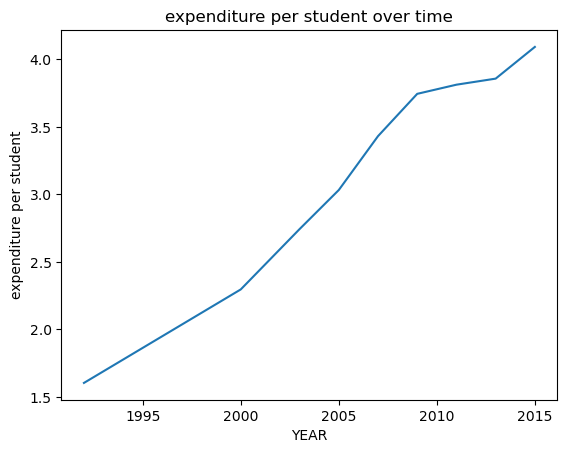

In [123]:
st.groupby('YEAR')["avg expenditure"].mean().plot()
plt.ylabel('expenditure per student')
plt.title('expenditure per student over time')

**<WE notice that average 8 th grade math score is keep increasing throught the time except for the suddendrop around 2012(might be due to policy change). 
Also, through time increase, higher average service support expenditure have been input. The two trend seems highly overlapped through glance, suggesting a positive correlation for later predict.\>**

**Visualization 2**

Text(0, 0.5, '8th Grade MATH Score')

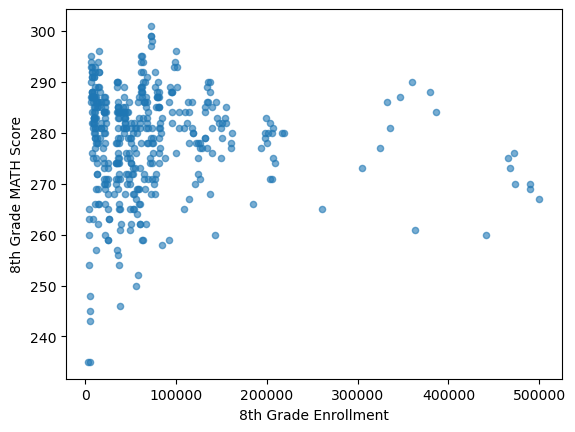

In [104]:
st.plot.scatter(x='GRADES_8_G', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Enrollment')
plt.ylabel('8th Grade MATH Score')

Text(0, 0.5, '8th Grade MATH Score')

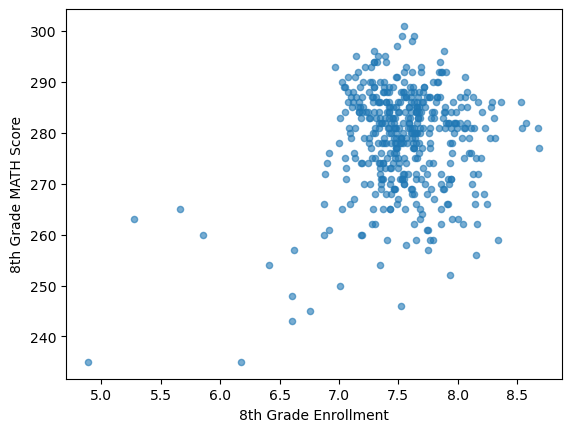

In [120]:
st.plot.scatter(x='grade 8 %', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Percentage')
plt.ylabel('8th Grade MATH Score')

Text(0, 0.5, '8th Grade MATH Score')

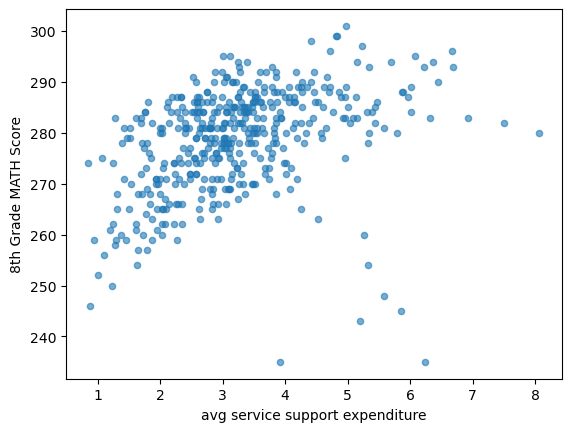

In [122]:
st.plot.scatter(x='avg expenditure', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('avg service support expenditure')
plt.ylabel('8th Grade MATH Score')

**<We could observe a slightly negatively correlated relationship between 8th grade enrollment population and average math score, and a slighly positive one for 8th grade enollment population. Among all three independent variables, average service support expenditure per person seems to have the strongest correlation(positive) with 9th grade average math score.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X = st[['GRADES_8_G','grade 8 %','avg expenditure']].dropna()
y = st.loc[X.index]['AVG_MATH_8_SCORE']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [108]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [109]:
# create your model here
model = LinearRegression()

In [110]:
model.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [112]:
print(model.intercept_)
print(model.coef_)

214.62835103035803
[-5.45977861e-07  6.98329894e+00  3.69612359e+00]


In [119]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
# There are many caveats to R^2 but it is a good starting point
model.score(X_test, y_test)

0.18988033929364445

In [118]:
# mean error
np.mean(model.predict(X_test)-y_test) #predicted value smaller than real value

1.7950505611211596

In [117]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

7.323006339199393

In [116]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

9.890495565734891

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

slope:  3.15237017860331


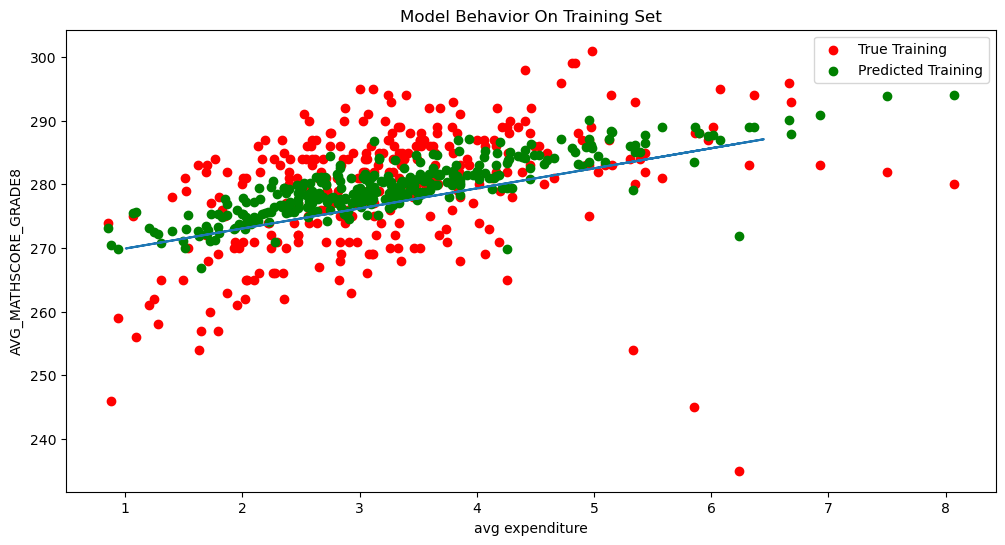

In [115]:
col_name = 'avg expenditure'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATHSCORE_GRADE8')
plt.title("Model Behavior On Training Set")
m, b = np.polyfit(X_test[col_name], y_test, 1)
plt.plot(X_test[col_name], m*X_test[col_name]+b)
print("slope: ",m)

slope:  5.773529361890314


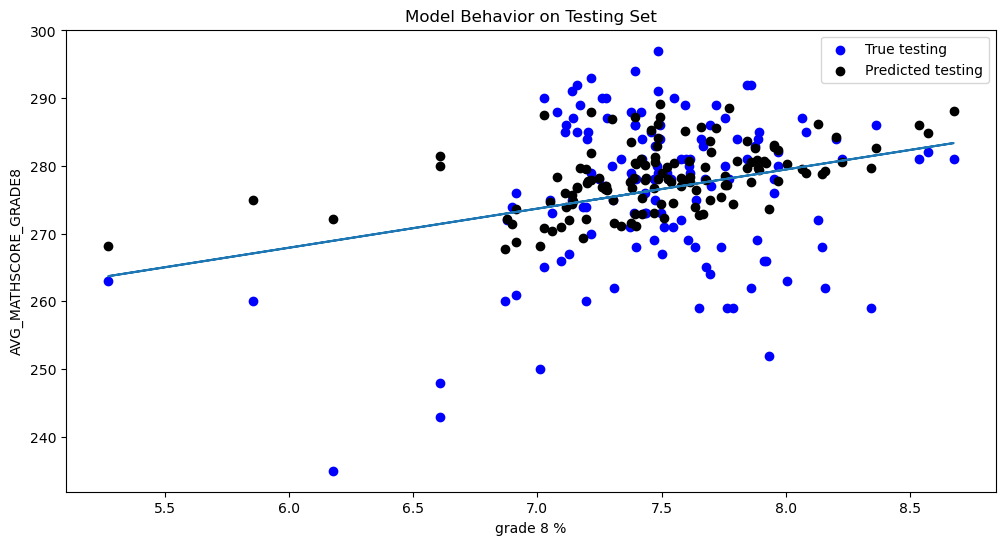

In [114]:
col_name = "grade 8 %"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATHSCORE_GRADE8')
plt.title("Model Behavior on Testing Set")
m, b = np.polyfit(X_test[col_name], y_test, 1)
plt.plot(X_test[col_name], m*X_test[col_name]+b)
print("slope: ",m)

<h2> Summary </h2>

The correlation between average grade 8 math score and 8th grade percentage over all enrollment is positive, the same with average service support expenditure. 

In terms of average expenditure, the predicted testing result performs slightly better than the true training;for grade 8 percentages, predicted the true results perform similarly.

If refering to metrics, this linear model doesn't perform quite well as only around 18% variance is being explained by the model(R^2). This could be due to limited sample points and parameters not being set accurately. Lack of regularization is also a possibility.